In [1]:
class Scan_Strategy:
    def __init__(self):
        self.prop = {};
    def Adding_prop(self, name: str, item):
        self.prop[name] = item;
    def Removing_prop(self, name:str):
        del self.prop[name];

def remove_dir(dir):
    dir = dir.replace('\\', '/')
    if(os.path.isdir(dir)):
        for p in os.listdir(dir):
            remove_dir(os.path.join(dir,p))
        if(os.path.exists(dir)):
            os.rmdir(dir)
    else:
        if(os.path.exists(dir)):
            os.remove(dir)

In [2]:
import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);

path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation";
os.chdir(path);
os.listdir(path);

Mounted at /content/drive


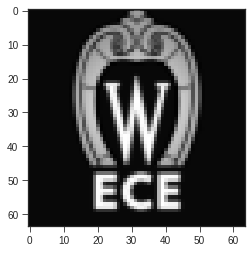

In [3]:
import numpy as np;
import matplotlib.pyplot as plt;
plt.style.use('seaborn-ticks')

#plt.style.use('classic');
#plt.rcParams['figure.figsize'] = [4,3];

import matplotlib.image as mpimg;

from PMT_compressed_sensing_simu import Compressed_sensing_PMT as CSP;
from YZ_masks import Haar_2d, Hyper_raster;

#from YZ_save_results import YZ_save_results as SR;

r = 64;
c = 64;



error = [];

pmt = CSP();
pmt.Load_img("ECE.jpg",RGB = False, size = (r,c), anti_aliasing = False); 

In [4]:
#########################################################
ratio_val = 0. ## to determine how many 1s in the masks!
Pnoise = True;
Gnoise = False;

Voxtel_camera = 25 * 256**2; ## the photon number per second for Vextel camera is 400
#########################################################


n_ph_per_sec = 1e6;

compress_rate = 0.3;

maximum_time = 100;
#maximum_time = 1e15;
#-------------------------------------------------------
ratio_val = 0.5;
mode = "AMC"
#-------------------------------------------------------

data_density = 10;

time = (np.arange(data_density)+1)/data_density*np.log10(maximum_time);
time = [-2, -1,-0] + list(time);
time = np.power(10, time);

In [5]:
## initialize the DMD masks for the four measure strategy!
_,_,layers = pmt.img_tensor.shape;

RS = Scan_Strategy();
RS.Adding_prop("cycles", r*c);
pmt.Make_DMD_basis(RS.prop["cycles"], scan_mode='Raster');
RS.Adding_prop("phi", pmt.DMD_basis);
RS.Adding_prop("n_photon", 1e6);
RS.Adding_prop("measure", np.zeros((RS.prop["cycles"], layers, len(time))));
RS.Adding_prop("error", np.zeros(len(time)));


BS = Scan_Strategy();
BS.Adding_prop("cycles", r*c);
pmt.Make_DMD_basis(BS.prop["cycles"], scan_mode='Basis', ratio = ratio_val);
BS.Adding_prop("phi", pmt.DMD_basis);
BS.Adding_prop("n_photon", 1e6);
BS.Adding_prop("measure", np.zeros((BS.prop["cycles"], layers, len(time))));
BS.Adding_prop("error", np.zeros(len(time)));

BS_CS = Scan_Strategy(); ## use CS to recons BS
BS_CS .Adding_prop("cycles", r*c);
pmt.Make_DMD_basis(BS_CS.prop["cycles"], scan_mode='Basis', ratio = ratio_val);
BS_CS .Adding_prop("phi", pmt.DMD_basis);
BS_CS .Adding_prop("n_photon", 1e6);
BS_CS .Adding_prop("measure", np.zeros((BS.prop["cycles"], layers, len(time))));
BS_CS .Adding_prop("error", np.zeros(len(time)));


HR = Scan_Strategy();
HR.Adding_prop("cycles", int(compress_rate * r*c));
pmt.Make_DMD_basis(HR.prop["cycles"], scan_mode='Basis', ratio = ratio_val);
HR.Adding_prop("phi", pmt.DMD_basis);
HR.Adding_prop("n_photon", 1e6);
HR.Adding_prop("measure", np.zeros((HR.prop["cycles"], layers, len(time))));
HR.Adding_prop("error", np.zeros(len(time)));


CS = Scan_Strategy();
CS.Adding_prop("cycles", int(compress_rate * r*c));

threshold = 1 - np.mean(HR.prop["phi"]);
random_mask = np.ceil(np.random.rand(CS.prop["cycles"], r*c) - threshold);

CS.Adding_prop("phi", random_mask);
CS.Adding_prop("n_photon", 1e6);
CS.Adding_prop("measure", np.zeros((CS.prop["cycles"], layers, len(time))));
CS.Adding_prop("error", np.zeros(len(time)));

Voxtel = Scan_Strategy();
Voxtel.Adding_prop("phi", RS.prop["phi"]);## same as Raster scan
Voxtel.Adding_prop("n_photon", 25*256**2);
Voxtel.Adding_prop("cycles", r*c);
Voxtel.Adding_prop("measure", np.zeros((Voxtel.prop["cycles"], layers, len(time))));
Voxtel.Adding_prop("error", np.zeros(len(time)));

print("BS mask mean: %.3e"%np.mean(BS.prop['phi']))
print("HR mask mean: %.3e"%np.mean(HR.prop['phi']))
print("CS mask mean: %.3e"%np.mean(CS.prop['phi']))

BS mask mean: 1.938e-01
HR mask mean: 2.007e-01
CS mask mean: 2.006e-01


In [6]:
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant";
os.chdir(path);

dir_name = "save simulation result";

if os.path.exists("save simulation result") == False:
    os.mkdir("save simulation result");


os.chdir(dir_name);

dir_name = mode;

if os.path.exists(dir_name) == False:
    os.mkdir(dir_name);


os.chdir(dir_name);


dir_name = "ratio_value %.2e"%ratio_val;

if os.path.exists(dir_name) == False:
    os.mkdir(dir_name);
os.chdir(dir_name);

In [7]:
#remove_dir("/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result")

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13


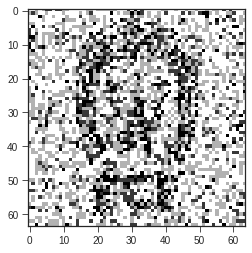

1 / 13


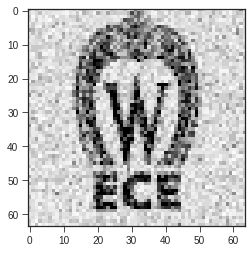

2 / 13


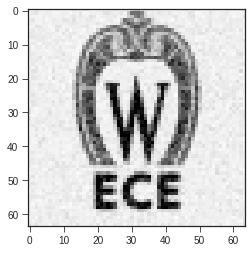

3 / 13


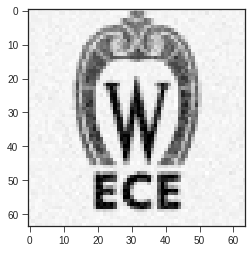

4 / 13


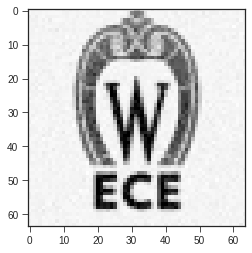

5 / 13


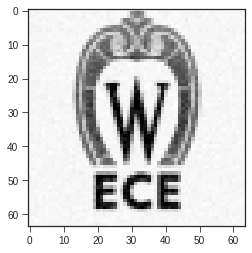

6 / 13


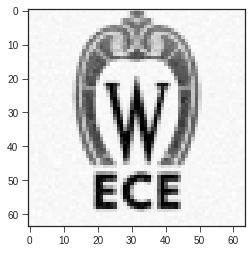

7 / 13


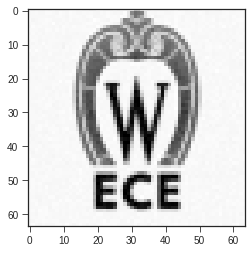

8 / 13


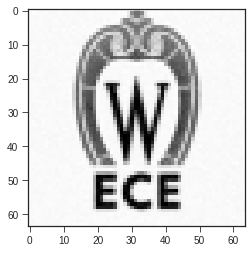

9 / 13


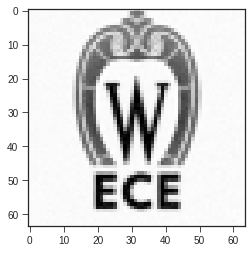

10 / 13


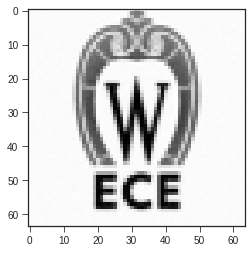

11 / 13


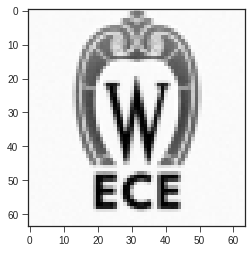

12 / 13


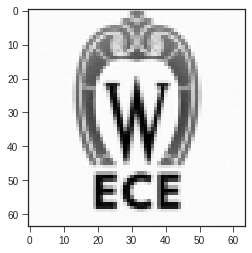

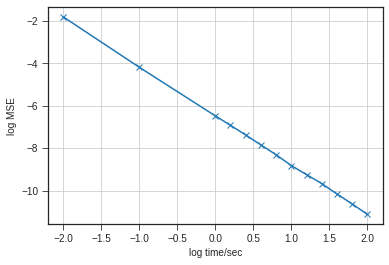

In [8]:
#path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
#os.chdir(path);
#path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result/AMC/ratio_value 4.00e-01"
dir_name = "RS";

path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;

os.chdir(path);

if os.path.exists(dir_name) == True:
    remove_dir(dir_name)
os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));

#############################################################################

### Raster scan
Obj = RS;

measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];

inv_basis = basis;
Error = Obj.prop["error"];

#factor = cycles * (r*c);
factor = np.sum(basis);
light_level = [];

for time_index in range(len(time)):

    

    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

#RS.prop["measure"] = measure;
################################################################################
#measure = RS.prop["measure"];


for time_index in range(len(time)):    
    
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, inv_basis, measure[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;
    
    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    
    Error[time_index] = this_error;

    #plt.text(0, -(recons_clipped * 0.1), self.condition, fontsize = (self.img.shape[0] * 0.1));
        #add text to fig        
    #plt.savefig(condition + ".png", bbox_inches = 'tight'); 
    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index, mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray')
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();




In [9]:
!pwd

/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result/AMC/ratio_value 5.00e-01/RS


|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13


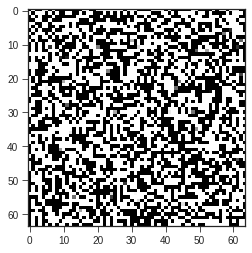

1 / 13


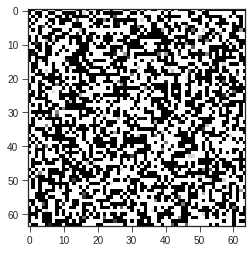

2 / 13


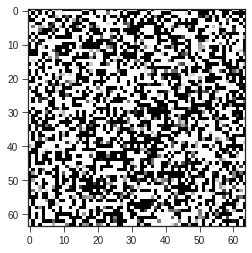

3 / 13


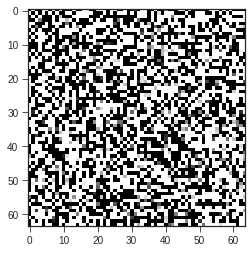

4 / 13


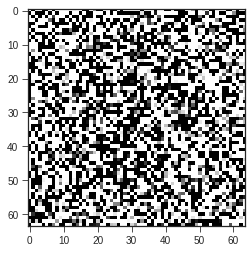

5 / 13


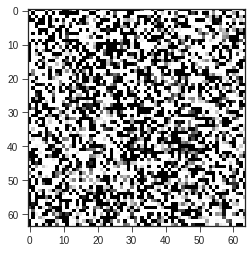

6 / 13


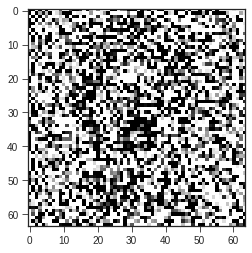

7 / 13


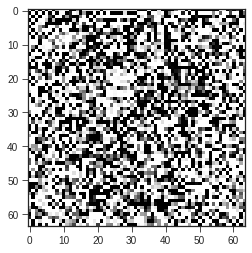

8 / 13


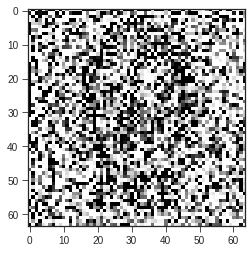

9 / 13


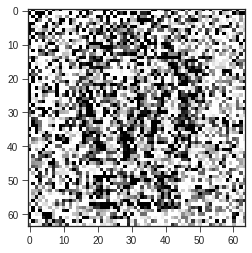

10 / 13


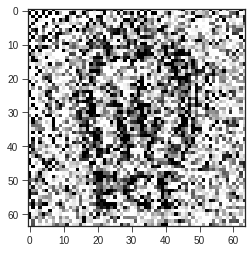

11 / 13


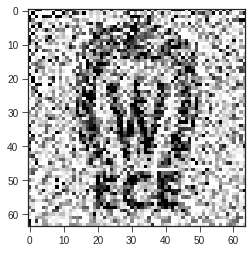

12 / 13


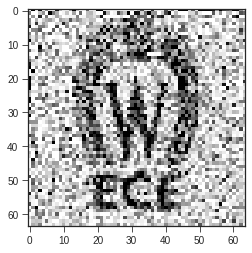

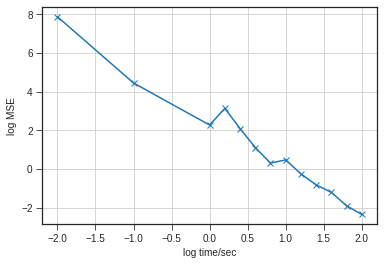

In [10]:
dir_name = "BS";

path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;

os.chdir(path);

if os.path.exists(dir_name) == True:
    remove_dir(dir_name);

os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));


light_level = [];
### Basis scan
Obj = BS;

measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];

inv_basis = np.linalg.pinv(basis);
Obj.Adding_prop("inv_phi", inv_basis);
Error = Obj.prop["error"];

#factor = cycles * (r*c);
factor = np.sum(basis);

for time_index in range(len(time)):
    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

#RS.prop["measure"] = measure;
################################################################################
#measure = RS.prop["measure"];


for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, inv_basis, measure[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;

    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    
    Error[time_index] = this_error;

    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index,mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray');
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();



|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.908e+05} |··················································| 0.0%
{cost = 1.404e+04} |>>>>>>>>>>········································| 20.0%
{cost = 6.711e+03} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 4.498e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.406e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.718e+03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

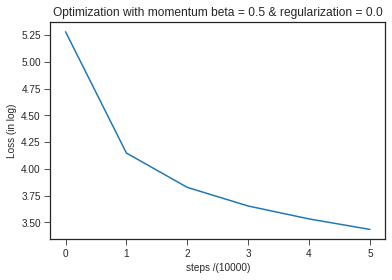

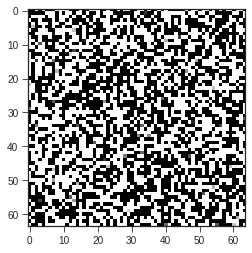

1 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.030e+05} |··················································| 0.0%
{cost = 1.519e+03} |>>>>>>>>>>········································| 20.0%
{cost = 7.217e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 4.947e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 4.040e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.195e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

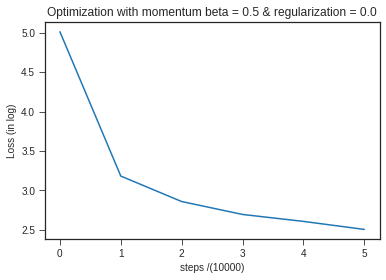

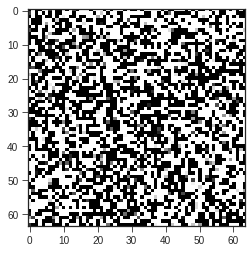

2 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.561e+04} |··················································| 0.0%
{cost = 1.580e+02} |>>>>>>>>>>········································| 20.0%
{cost = 8.933e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 5.616e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 4.882e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.556e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

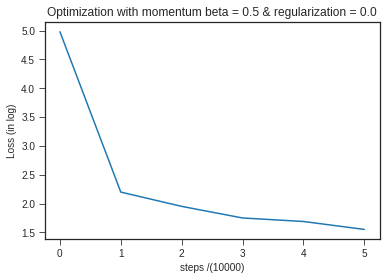

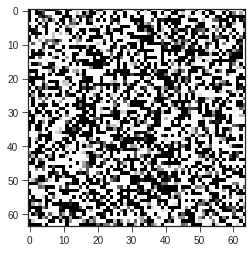

3 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.485e+04} |··················································| 0.0%
{cost = 9.555e+01} |>>>>>>>>>>········································| 20.0%
{cost = 4.875e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.376e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.896e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.960e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

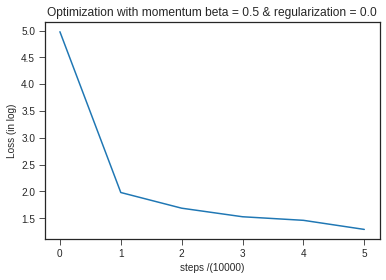

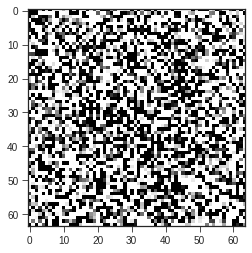

4 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.491e+04} |··················································| 0.0%
{cost = 6.334e+01} |>>>>>>>>>>········································| 20.0%
{cost = 3.340e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 2.347e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.798e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.509e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

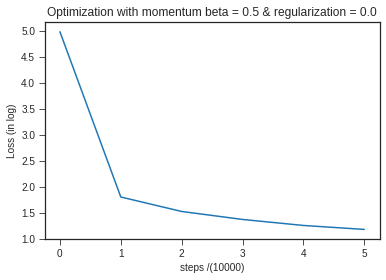

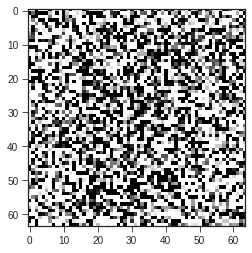

5 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.459e+04} |··················································| 0.0%
{cost = 4.055e+01} |>>>>>>>>>>········································| 20.0%
{cost = 2.179e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.196e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.192e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 7.200e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

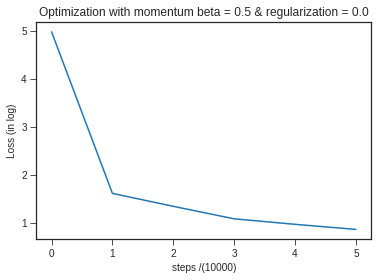

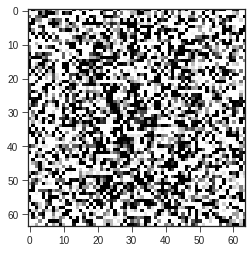

6 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.471e+04} |··················································| 0.0%
{cost = 2.424e+01} |>>>>>>>>>>········································| 20.0%
{cost = 1.154e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 7.723e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 5.678e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 4.528e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

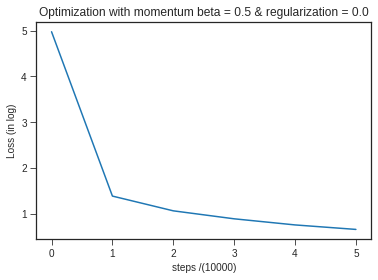

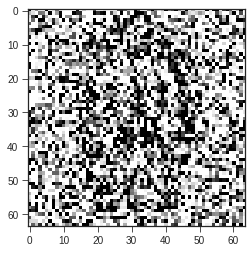

7 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.460e+04} |··················································| 0.0%
{cost = 1.534e+01} |>>>>>>>>>>········································| 20.0%
{cost = 7.680e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 4.937e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.917e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.756e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

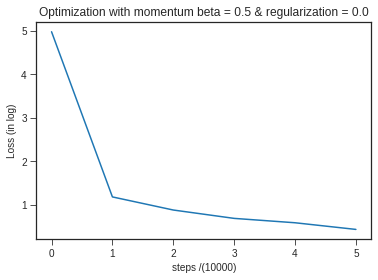

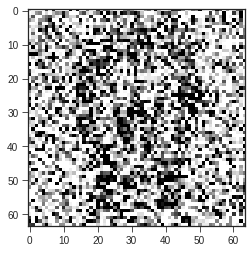

8 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.461e+04} |··················································| 0.0%
{cost = 9.918e+00} |>>>>>>>>>>········································| 20.0%
{cost = 4.922e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 3.415e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.479e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.088e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

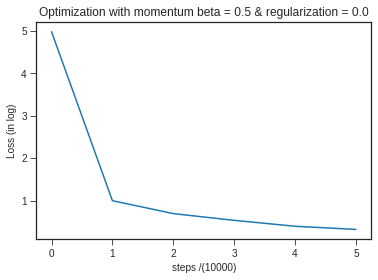

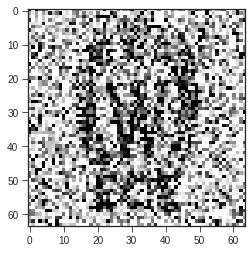

9 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.448e+04} |··················································| 0.0%
{cost = 6.380e+00} |>>>>>>>>>>········································| 20.0%
{cost = 3.042e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.872e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.423e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.142e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

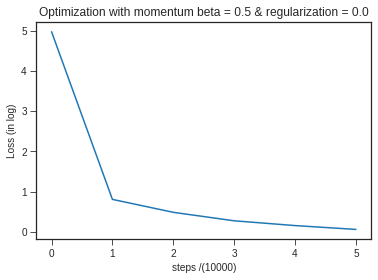

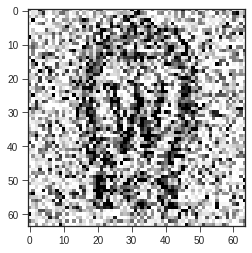

10 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.445e+04} |··················································| 0.0%
{cost = 4.604e+00} |>>>>>>>>>>········································| 20.0%
{cost = 2.141e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.403e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.903e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 7.736e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

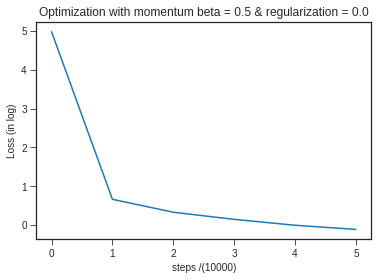

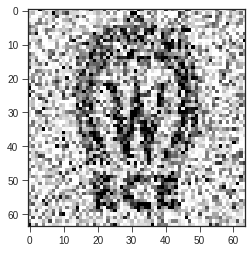

11 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.443e+04} |··················································| 0.0%
{cost = 2.845e+00} |>>>>>>>>>>········································| 20.0%
{cost = 1.318e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 9.118e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 6.879e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 6.095e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

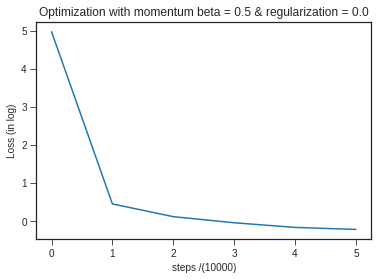

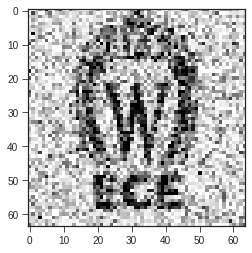

12 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.446e+04} |··················································| 0.0%
{cost = 2.060e+00} |>>>>>>>>>>········································| 20.0%
{cost = 9.760e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 5.370e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 3.627e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.280e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

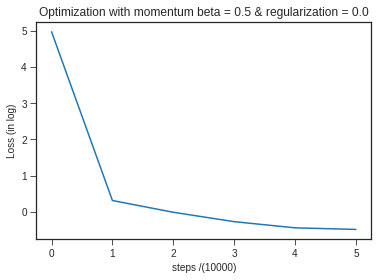

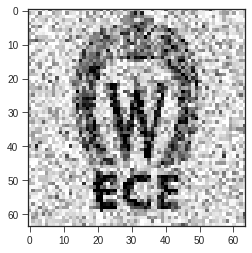

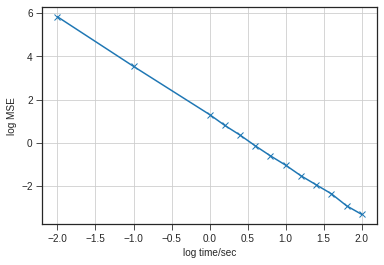

In [11]:
dir_name = 'BS_CS';
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;

os.chdir(path);
if os.path.exists(dir_name) == True:
    remove_dir(dir_name)
os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));

light_level = [];

### BS_CS
Obj = BS_CS;
measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];

Error = Obj.prop["error"];

#factor = cycles * (r*c);
factor = np.sum(basis);

for time_index in range(len(time)):
    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

###############################################################################
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_reconstruct(r,c,measure[:,:,time_index], upload_DMD_basis = basis,
                        user_evaluation = False, learning_rate = 2e-3,
                        regularization = 0e-3, plot_step= 10000, max_epoch = 50000);

    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;
    
    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    Error[time_index] = this_error;

    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index,mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray')
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.333e+05} |··················································| 0.0%
{cost = 8.406e+00} |>>>>>>>>>>········································| 20.0%
{cost = 6.460e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.267e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.143e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.171e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

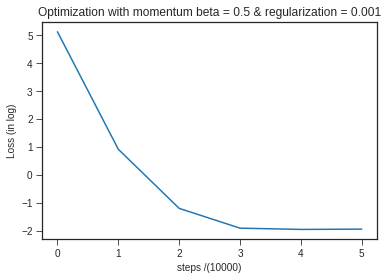

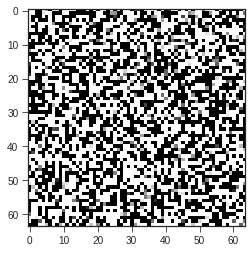

1 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.948e+04} |··················································| 0.0%
{cost = 1.381e+00} |>>>>>>>>>>········································| 20.0%
{cost = 2.760e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.283e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.217e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.231e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

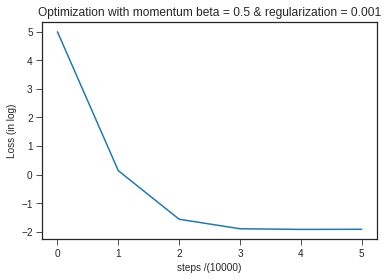

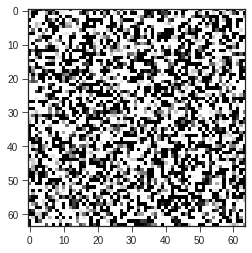

2 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.734e+04} |··················································| 0.0%
{cost = 1.293e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.389e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.107e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.078e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.131e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

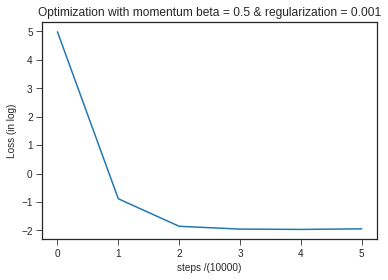

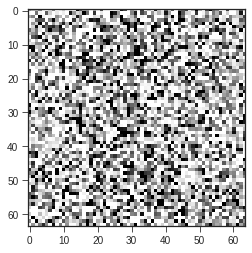

3 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.708e+04} |··················································| 0.0%
{cost = 1.076e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.438e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.182e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.131e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.223e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

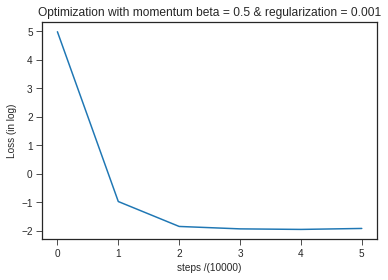

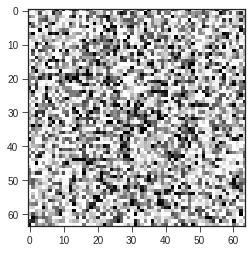

4 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.711e+04} |··················································| 0.0%
{cost = 8.478e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.366e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.176e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.133e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.117e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

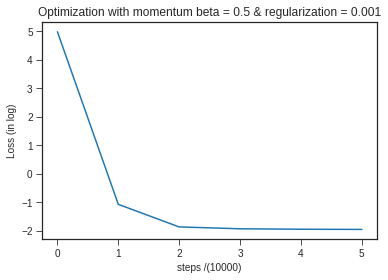

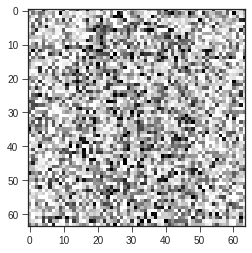

5 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.717e+04} |··················································| 0.0%
{cost = 7.818e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.391e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.167e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.142e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.135e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

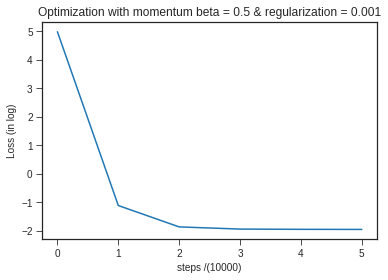

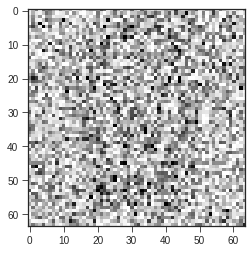

6 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.714e+04} |··················································| 0.0%
{cost = 5.432e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.314e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.106e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.063e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.107e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

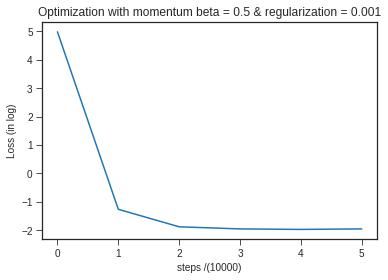

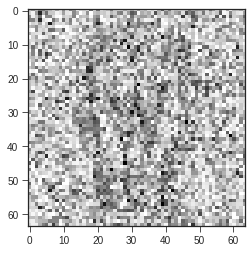

7 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.730e+04} |··················································| 0.0%
{cost = 4.155e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.153e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.027e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.048e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.025e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

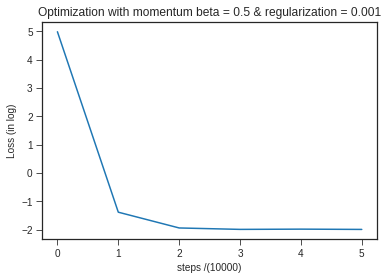

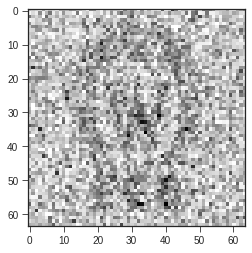

8 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.710e+04} |··················································| 0.0%
{cost = 3.058e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.106e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.007e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.953e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 9.948e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

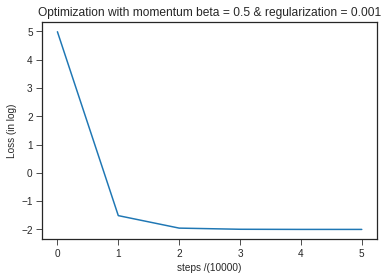

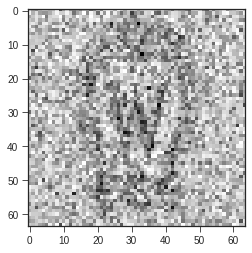

9 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.725e+04} |··················································| 0.0%
{cost = 3.068e-02} |>>>>>>>>>>········································| 20.0%
{cost = 1.037e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 9.832e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.287e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 8.885e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

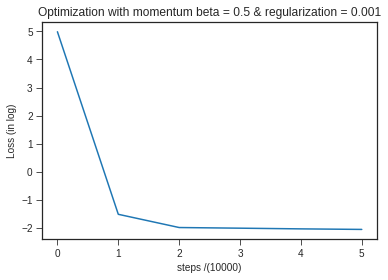

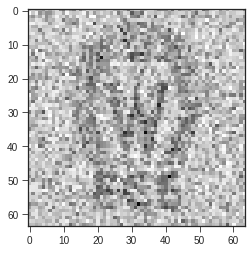

10 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.719e+04} |··················································| 0.0%
{cost = 2.177e-02} |>>>>>>>>>>········································| 20.0%
{cost = 9.891e-03} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 8.592e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 8.764e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 8.671e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

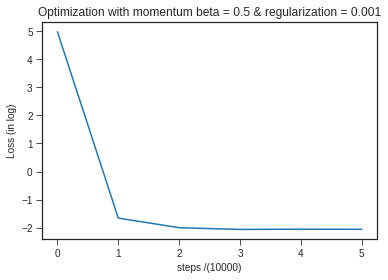

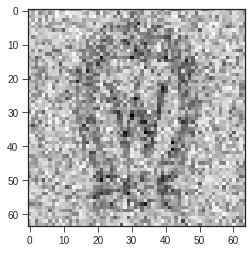

11 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.715e+04} |··················································| 0.0%
{cost = 1.948e-02} |>>>>>>>>>>········································| 20.0%
{cost = 9.159e-03} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 8.612e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 8.592e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 8.367e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

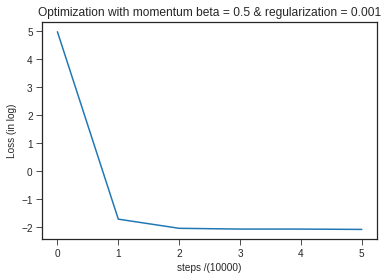

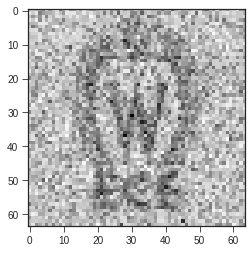

12 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 9.714e+04} |··················································| 0.0%
{cost = 1.891e-02} |>>>>>>>>>>········································| 20.0%
{cost = 8.872e-03} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 8.583e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 8.781e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 8.058e-03} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

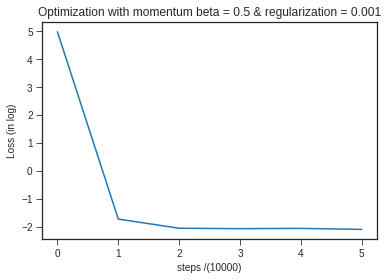

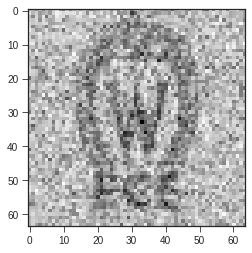

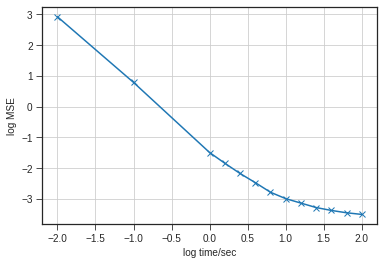

In [12]:
dir_name = 'CS'
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;
os.chdir(path);
if os.path.exists(dir_name) == True:
    remove_dir(dir_name)
os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));

light_level = [];

### CS
Obj = CS;
measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];

Error = Obj.prop["error"];

#factor = cycles * (r*c);
factor = np.sum(basis);

for time_index in range(len(time)):
    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

###############################################################################
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_reconstruct(r,c,measure[:,:,time_index], upload_DMD_basis = basis,
                        user_evaluation = False, learning_rate = 2e-3,
                        regularization = 1e-3, plot_step= 10000, max_epoch = 50000);

    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;
    
    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    Error[time_index] = this_error;

    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index,mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray')
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.393e+05} |··················································| 0.0%
{cost = 4.525e+02} |>>>>>>>>>>········································| 20.0%
{cost = 2.122e+02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.270e+02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 9.083e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 7.722e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

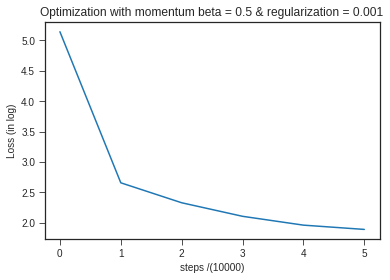

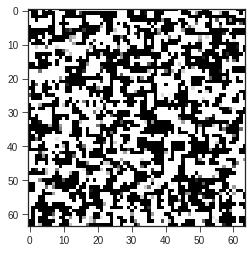

1 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.045e+05} |··················································| 0.0%
{cost = 9.711e+01} |>>>>>>>>>>········································| 20.0%
{cost = 4.200e+01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 8.785e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.410e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 2.080e+01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

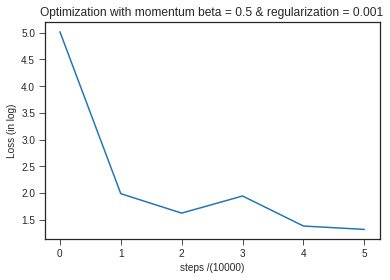

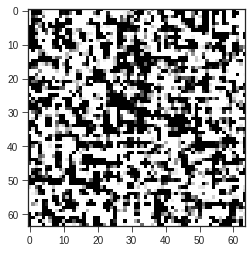

2 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.011e+05} |··················································| 0.0%
{cost = 6.980e+00} |>>>>>>>>>>········································| 20.0%
{cost = 4.894e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 2.972e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.278e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.859e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

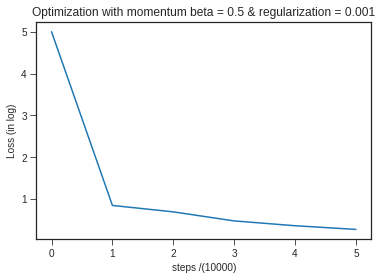

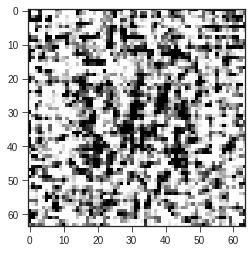

3 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 3.198e+00} |>>>>>>>>>>········································| 20.0%
{cost = 1.948e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.396e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.603e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 8.365e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

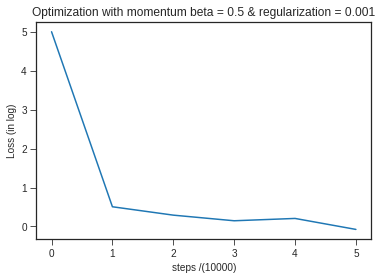

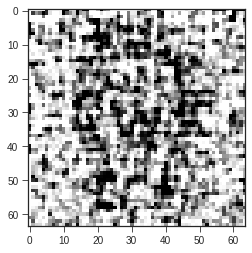

4 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.011e+05} |··················································| 0.0%
{cost = 4.291e+00} |>>>>>>>>>>········································| 20.0%
{cost = 2.005e+00} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.600e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.239e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.629e+00} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

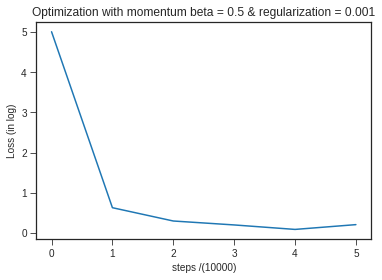

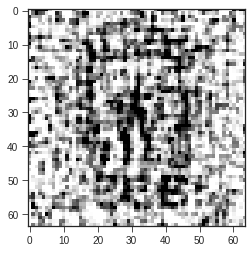

5 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 6.701e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.836e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.144e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 8.539e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 7.910e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

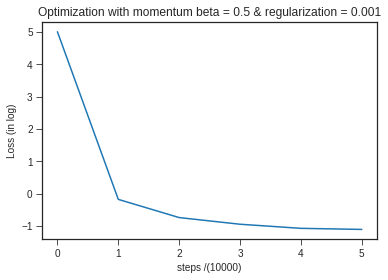

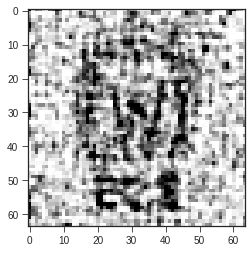

6 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.011e+05} |··················································| 0.0%
{cost = 6.890e-01} |>>>>>>>>>>········································| 20.0%
{cost = 3.277e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.977e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.251e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 9.803e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

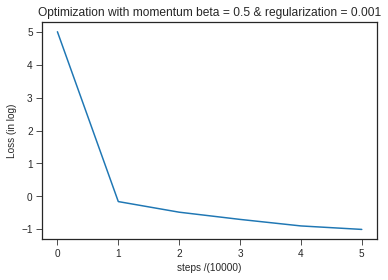

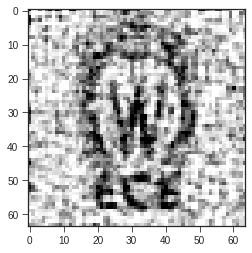

7 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.014e+05} |··················································| 0.0%
{cost = 4.690e-01} |>>>>>>>>>>········································| 20.0%
{cost = 2.175e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.346e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.015e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 9.307e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

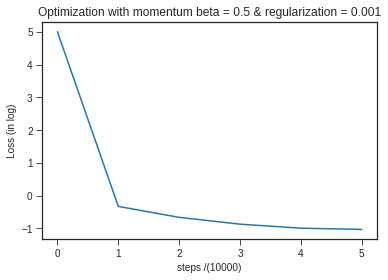

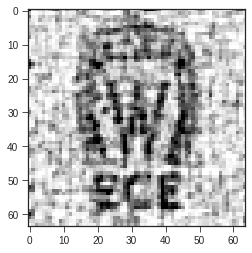

8 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 4.253e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.940e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 1.291e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 1.344e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 7.994e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

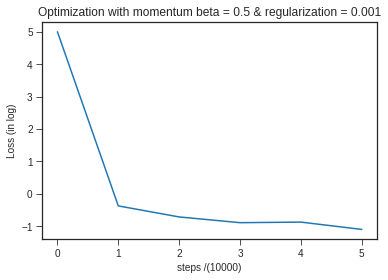

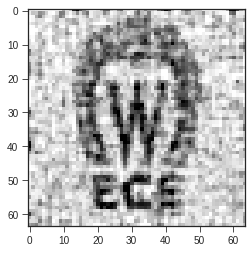

9 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 2.931e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.363e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 6.973e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 6.737e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.032e-01} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

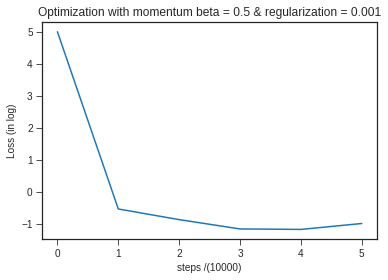

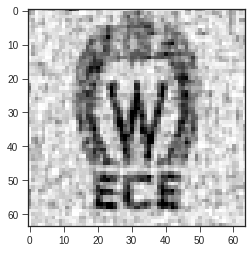

10 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.011e+05} |··················································| 0.0%
{cost = 2.505e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.043e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 6.434e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 4.650e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.994e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

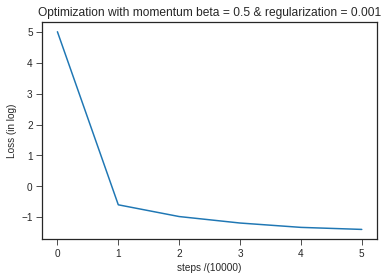

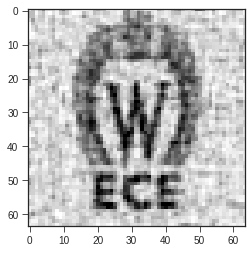

11 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 2.382e-01} |>>>>>>>>>>········································| 20.0%
{cost = 1.210e-01} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 5.745e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 4.130e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 3.370e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

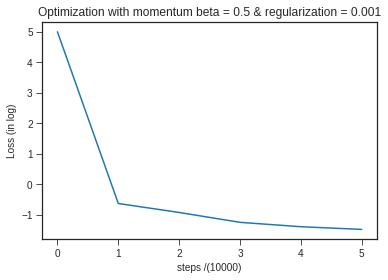

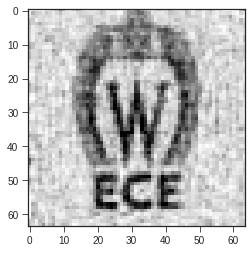

12 / 13
Mini-batch (size 10) Gradient Ascent!

{cost = 1.012e+05} |··················································| 0.0%
{cost = 1.229e-01} |>>>>>>>>>>········································| 20.0%
{cost = 3.581e-02} |>>>>>>>>>>>>>>>>>>>>······························| 40.0%
{cost = 2.234e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>····················| 60.0%
{cost = 2.045e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>··········| 80.0%
{cost = 1.816e-02} |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!

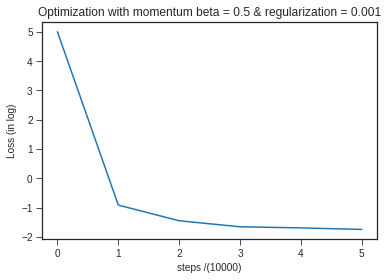

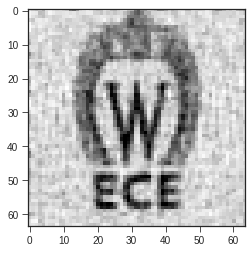

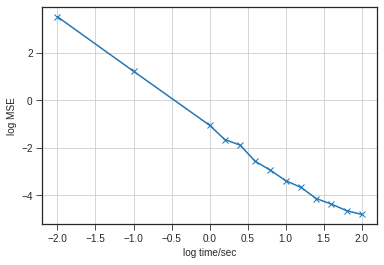

In [13]:
dir_name = 'HR'
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;
os.chdir(path);
if os.path.exists(dir_name) == True:
    remove_dir(dir_name)
os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));

light_level = [];

### HR
Obj = HR;
measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];

Error = Obj.prop["error"];

#factor = cycles * (r*c);
factor = np.sum(basis);

for time_index in range(len(time)):
    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

###############################################################################
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_reconstruct(r,c,measure[:,:,time_index], upload_DMD_basis = basis,
                        user_evaluation = False, learning_rate = 2e-3,
                        regularization = 1e-3, plot_step= 10000, max_epoch = 50000);

    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;
    
    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    Error[time_index] = this_error;

    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index,mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray')
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 100.0% (^_^)/ Done!0 / 13


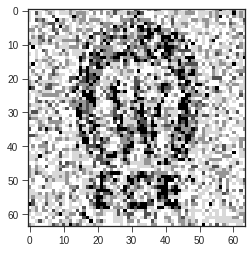

1 / 13


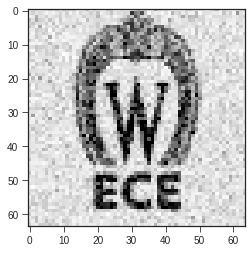

2 / 13


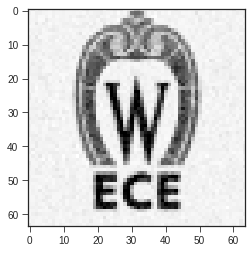

3 / 13


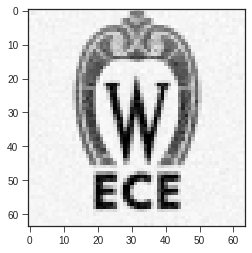

4 / 13


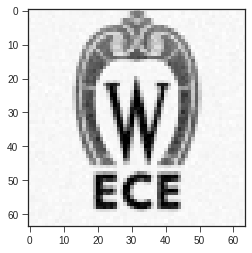

5 / 13


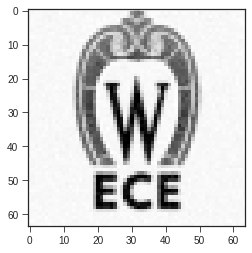

6 / 13


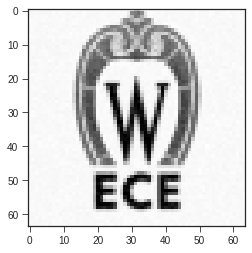

7 / 13


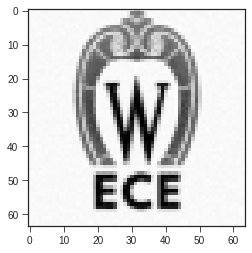

8 / 13


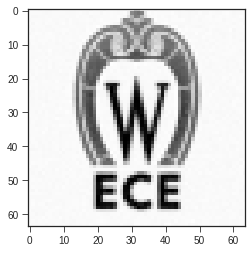

9 / 13


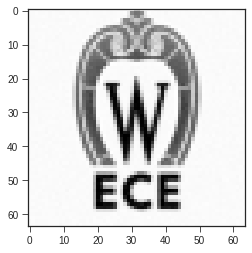

10 / 13


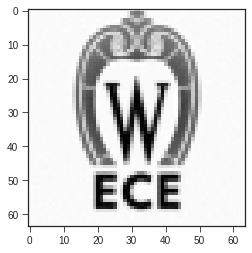

11 / 13


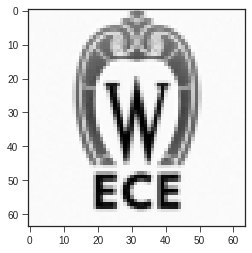

12 / 13


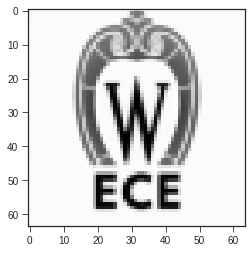

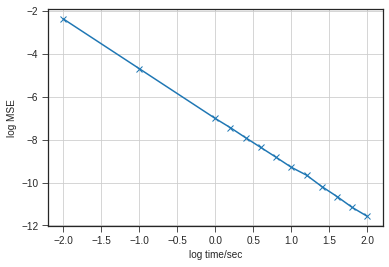

In [14]:
dir_name = 'Voxtel'
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation/Before and After mask constant/save simulation result";
path += ('/' + mode);
path += "/ratio_value %.2e"%ratio_val;
os.chdir(path);
if os.path.exists(dir_name) == True:
    remove_dir(dir_name)
os.mkdir(dir_name);

os.chdir('/'.join([path, dir_name]));

light_level = [];


### Voxtel
Obj = Voxtel;
measure = Obj.prop["measure"];
photon_per_sec = Obj.prop["n_photon"];
cycles = Obj.prop["cycles"];
basis = Obj.prop["phi"];
inv_basis = basis;

Error = Obj.prop["error"];

factor = (r*c); ## every pixel: n_photons / (n_pixels)

for time_index in range(len(time)):
    pmt.YZ_process_bar((time_index+1)/len(time), theme = False);
    time_ep = time[time_index];

    n_ph_tot = time_ep * photon_per_sec;    
    light_level += [n_ph_tot / factor];
    measure[:,:,time_index] = pmt.PMT_measure_simu(light_level[-1], cycles,
                                                   Poisson = Pnoise, Gaussian = Gnoise,
                                                   upload_DMD_basis = basis);

for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, inv_basis, measure[:,:,time_index], CS = False);

    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);

    recons_clipped = pmt.img_reconstructed;
    this_error = (np.mean((recons_clipped - pmt.img)**2));    
    
    Error[time_index] = this_error;

    condition = "%s. mode: %s_time: %.2e light_level: %.2e"%(time_index,mode, time[time_index], light_level[time_index])
    mpimg.imsave( condition +'.png', pmt.img_reconstructed, cmap = 'gray')
    
plt.figure();
plt.plot(np.log10(time), np.log(Error), marker = 'x');
plt.xlabel("log time/sec");
plt.ylabel("log MSE");
plt.grid();
plt.savefig("Error.jpg");
plt.show();

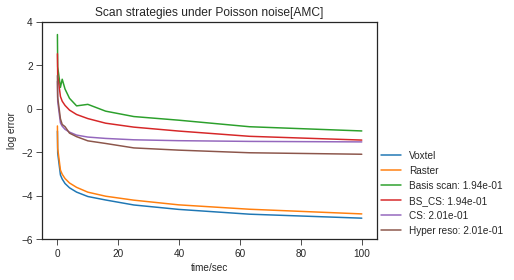

In [15]:
plt.figure();
plt.plot(time, np.log10(Voxtel.prop["error"]), label = "Voxtel")
plt.plot(time, np.log10(RS.prop["error"]), label = "Raster");
plt.plot(time, np.log10(BS.prop["error"]), label = "Basis scan: %.2e"%(np.mean(BS.prop['phi'])));
plt.plot(time, np.log10(BS_CS.prop["error"]), label = "BS_CS: %.2e"%(np.mean(BS_CS.prop['phi'])));
plt.plot(time, np.log10(CS.prop["error"]), label = "CS: %.2e"%(np.mean(CS.prop['phi'])));
plt.plot(time, np.log10(HR.prop["error"]), label = "Hyper reso: %.2e"%(np.mean(HR.prop['phi'])));
#plt.plot(time, np.log10(Error_hr_Haar), label = "Hyper reso + Haar basis");

plt.xlabel("time/sec");
plt.ylabel("log error");
plt.ylim(-6,4)
plt.title("Scan strategies under Poisson noise[AMC]")
plt.legend(loc=[1,0]);
plt.show();

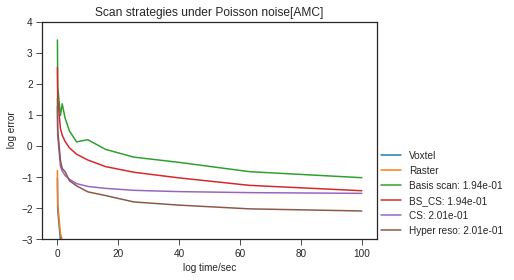

In [16]:
plt.figure();

plt.plot(time, np.log10(Voxtel.prop["error"]), label = "Voxtel")
plt.plot(time, np.log10(RS.prop["error"]), label = "Raster");

plt.plot((time), np.log10(BS.prop["error"]), label = "Basis scan: %.2e"%(np.mean(BS.prop['phi'])));
plt.plot((time), np.log10(BS_CS.prop["error"]), label = "BS_CS: %.2e"%(np.mean(BS_CS.prop['phi'])));

plt.plot((time), np.log10(CS.prop["error"]), label = "CS: %.2e"%(np.mean(CS.prop['phi'])));
plt.plot((time), np.log10(HR.prop["error"]), label = "Hyper reso: %.2e"%(np.mean(HR.prop['phi'])));
#plt.plot(time, np.log10(Error_hr_Haar), label = "Hyper reso + Haar basis");

plt.xlabel("log time/sec");
plt.ylabel(" log error");
plt.ylim(-3,4.)
plt.title("Scan strategies under Poisson noise[AMC]")
plt.legend(loc=[1,0]);
plt.show();

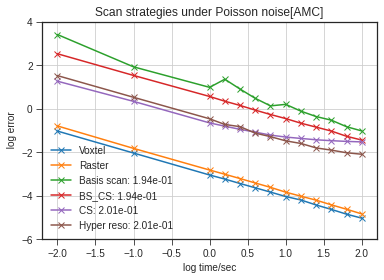

In [17]:
os.chdir(path);

plt.figure();
plt.plot(np.log10(time), np.log10(Voxtel.prop["error"]), marker = 'x',label = "Voxtel")
plt.plot(np.log10(time), np.log10(RS.prop["error"]), marker = 'x',label = "Raster");
'''
plt.plot(np.log(time), np.log10(BS.prop["error"]), label = "Basis scan:"+str(ratio_val));
plt.plot(np.log(time), np.log10(CS.prop["error"]), label = "CS:" +str(ratio_val));
plt.plot(np.log(time), np.log10(HR.prop["error"]), label = "Hyper reso:"+str(ratio_val));
'''
plt.plot(np.log10(time), np.log10(BS.prop["error"]), marker = 'x', label = "Basis scan: %.2e"%(np.mean(BS.prop['phi'])));
plt.plot(np.log10(time), np.log10(BS_CS.prop["error"]), marker = 'x', label = "BS_CS: %.2e"%(np.mean(BS_CS.prop['phi'])));

plt.plot(np.log10(time), np.log10(CS.prop["error"]), marker = 'x',label = "CS: %.2e"%(np.mean(CS.prop['phi'])));
plt.plot(np.log10(time), np.log10(HR.prop["error"]), marker = 'x',label = "Hyper reso: %.2e"%(np.mean(HR.prop['phi'])));
#plt.plot(time, np.log10(Error_hr_Haar), label = "Hyper reso + Haar basis");

plt.xlabel("log time/sec");
plt.ylabel(" log error");
plt.ylim(-6,4.)
plt.title("Scan strategies under Poisson noise[AMC]")
plt.legend(loc=False);
plt.grid();

plt.savefig("MSE.png")
plt.show();

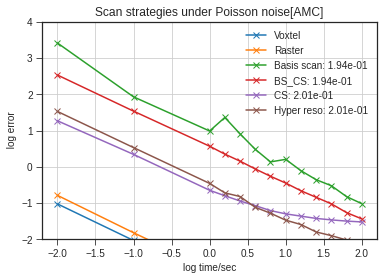

In [18]:
os.chdir(path);

plt.figure();

plt.plot(np.log10(time), np.log10(Voxtel.prop["error"]), marker = 'x',label = "Voxtel")
plt.plot(np.log10(time), np.log10(RS.prop["error"]), marker = 'x',label = "Raster");

plt.plot(np.log10(time), np.log10(BS.prop["error"]), marker = 'x',label = "Basis scan: %.2e"%(np.mean(BS.prop['phi'])));
plt.plot(np.log10(time), np.log10(BS_CS.prop["error"]), marker = 'x',label = "BS_CS: %.2e"%(np.mean(BS_CS.prop['phi'])));

plt.plot(np.log10(time), np.log10(CS.prop["error"]), marker = 'x',label = "CS: %.2e"%(np.mean(CS.prop['phi'])));
plt.plot(np.log10(time), np.log10(HR.prop["error"]), marker = 'x',label = "Hyper reso: %.2e"%(np.mean(HR.prop['phi'])));
#plt.plot(time, np.log10(Error_hr_Haar), label = "Hyper reso + Haar basis");

plt.xlabel("log time/sec");
plt.ylabel(" log error");
plt.ylim(-2,4.)
plt.title("Scan strategies under Poisson noise[AMC]")
plt.legend(loc= False);
plt.grid();
plt.savefig("MSE_zoomed_in.png")
plt.show();

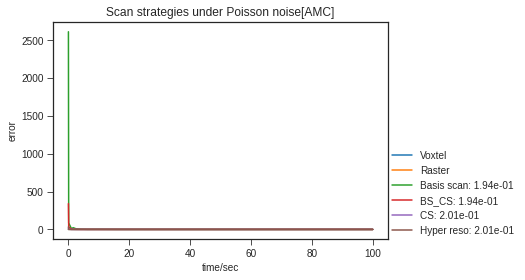

In [19]:
plt.figure();
plt.plot((time), (Voxtel.prop["error"]), label = "Voxtel")
plt.plot((time), (RS.prop["error"]), label = "Raster");
plt.plot((time), (BS.prop["error"]), label = "Basis scan: %.2e"%(np.mean(BS.prop['phi'])));
plt.plot((time), (BS_CS.prop["error"]), label = "BS_CS: %.2e"%(np.mean(BS_CS.prop['phi'])));
plt.plot((time), (CS.prop["error"]), label = "CS: %.2e"%(np.mean(CS.prop['phi'])));
plt.plot((time), (HR.prop["error"]), label = "Hyper reso: %.2e"%(np.mean(HR.prop['phi'])));
#plt.plot(time, np.log10(Error_hr_Haar), label = "Hyper reso + Haar basis");

plt.xlabel("time/sec");
plt.ylabel("error");
#plt.ylim(-6,4.)
plt.title("Scan strategies under Poisson noise[AMC]")
plt.legend(loc=[1,0]);
plt.show();